
# <center><font color= #F08080 > <b>CU18_Comportamienta Infra. Eventos extremos</font></center>

#  <font color='green'>IV. Model development</font>

En este anexo se incluye el código utilizado durante el desarrollo 
de los modelos incluidos en el caso de uso.

## Ejemplos pasos



### Paso 4 cluster


HTML widgets cannot be represented in plain text (need html)

Rows: 5 Columns: 139
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl (139): consultorios_de_salud, helisuperficies, centros_de_atencion_a_dro...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


HTML widgets cannot be represented in plain text (need html)

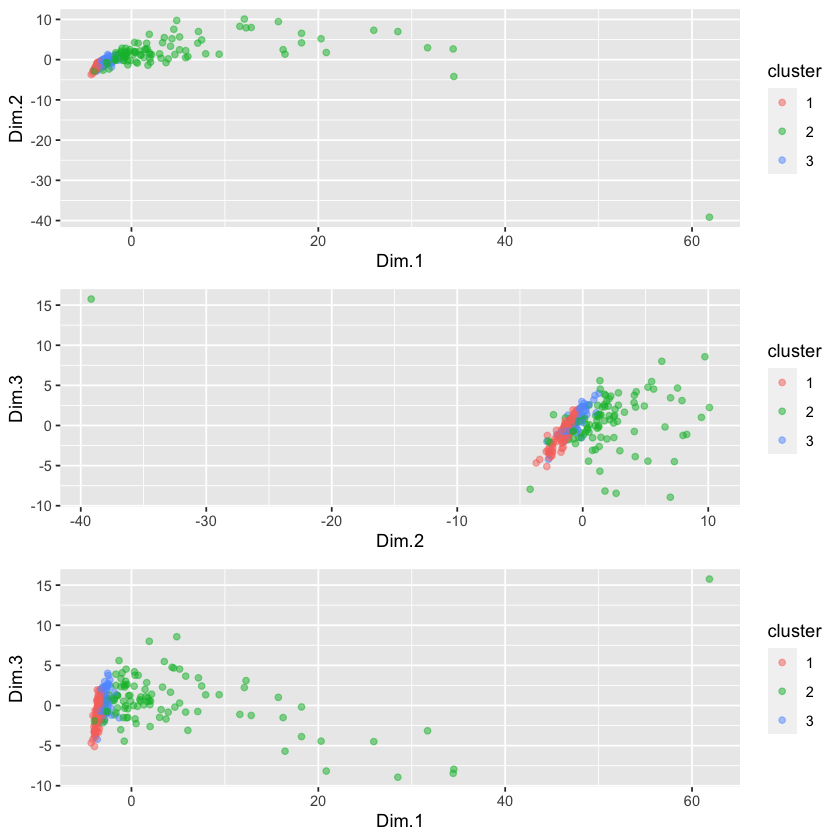

HTML widgets cannot be represented in plain text (need html)

Rows: 5 Columns: 8
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl (8): capacidad, demanda, evento_infra, evento_zona, tmed, prec, velmedia...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


HTML widgets cannot be represented in plain text (need html)

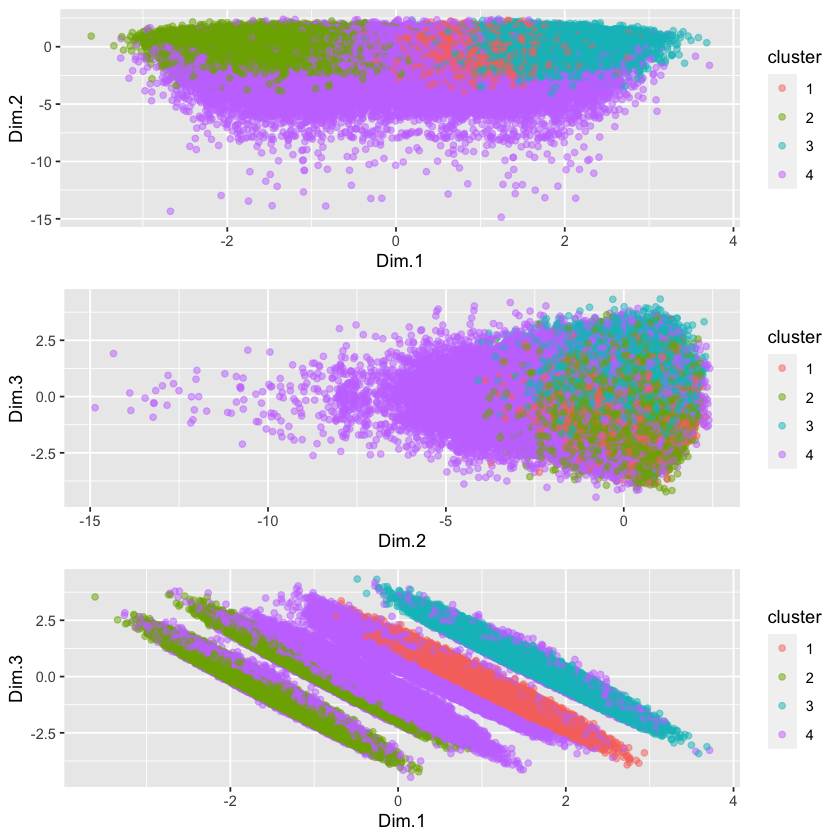

In [10]:
library(readr)
library(dplyr)
library(ggplot2)
library(gridExtra)
library(mclust)
library(DT)

## Cluster: DISTRITOS

dfout <- read_rds("datos_cluster_distritos.rds")
df_mc <- read_rds("modelo_cluster_distritos.rds")

## Ejemplo gráfico ----

## pasar a ggplotly

library(ggplot2)
p1 <- dfout |> ggplot(aes(x = Dim.1, y = Dim.2, col = cluster)) +
  geom_point(alpha = 0.5)
p2 <- dfout |> ggplot(aes(x = Dim.2, y = Dim.3, col = cluster)) +
  geom_point(alpha = 0.5)
p3 <- dfout |> ggplot(aes(x = Dim.1, y = Dim.3, col = cluster)) +
  geom_point(alpha = 0.5)

grid.arrange(p1, p2, p3)

## Ejemplo tabla

dfout |> 
  group_by(cluster) |> 
  summarise(n = n(),
            across(9:146, mean)) |> 
  datatable()

## Ejemplo predicción escenario

escenario <- read_csv("ESCENARIO_CLUSTER_DIST.csv")

escenario |> 
  mutate(Cluster = predict(df_mc, escenario)$classification,
         .before = 1) |> 
  datatable()

## ---------------------

## Cluster: DIARIO

dfout <- read_rds("datos_cluster_diario.rds")
df_mc <- read_rds("modelo_cluster_diario.rds")

## Ejemplo gráfico ----
## este son muchos puntos, no pasar a ggplotly

library(ggplot2)
p1 <- dfout |> ggplot(aes(x = Dim.1, y = Dim.2, col = cluster)) +
  geom_point(alpha = 0.5)
p2 <- dfout |> ggplot(aes(x = Dim.2, y = Dim.3, col = cluster)) +
  geom_point(alpha = 0.5)
p3 <- dfout |> ggplot(aes(x = Dim.1, y = Dim.3, col = cluster)) +
  geom_point(alpha = 0.5)

grid.arrange(p1, p2, p3)

## Ejemplo tabla

dfout |> 
  group_by(cluster) |> 
  summarise(across(9:15, mean)) |> 
  datatable()

## Ejemplo predicción escenario

escenario <- read_csv("ESCENARIO_CLUSTER_DIARIO.csv")

escenario |> 
  mutate(Cluster = predict(df_mc, escenario)$classification,
         .before = 1) |> 
  datatable()


### Datos

In [11]:
df <- read_csv("CU_18_05_20_diario_infra.csv")





Rows: 415370 Columns: 10
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl  (9): id_inf, capacidad, demanda, evento_infra, evento_zona, tmed, prec,...
date (1): fecha

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Ajuste modelo

In [12]:
mod_infra <- df |> select(-c(id_inf, fecha, evento_zona)) |> 
  glm(evento_infra ~ ., data = _, family = binomial)

mod_zona <- df |> select(-c(id_inf, fecha, evento_infra)) |> 
  glm(evento_zona ~ ., data = _, family = binomial)

write_rds(mod_infra, "mod_glm_infra.rds")
write_rds(mod_zona, "mod_glm_zona.rds")

### Ejemplos GLM


Call:
glm(formula = evento_infra ~ ., family = binomial, data = select(df, 
    -c(id_inf, fecha, evento_zona)))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8714  -0.6735   0.6287   0.6721   1.9005  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  2.990e-01  2.063e-01   1.449    0.147    
capacidad   -1.286e-02  1.339e-04 -96.038   <2e-16 ***
demanda      1.260e-02  3.699e-05 340.618   <2e-16 ***
tmed         4.338e-04  5.400e-04   0.803    0.422    
prec         2.730e-04  1.025e-03   0.266    0.790    
velmedia     1.059e-03  2.539e-03   0.417    0.677    
presMax     -5.461e-05  1.722e-04  -0.317    0.751    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 523764  on 377815  degrees of freedom
Residual deviance: 378204  on 377809  degrees of freedom
  (37554 observations deleted due to missingness)
AIC: 378218

Number of Fish

Rows: 10 Columns: 6
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl (6): capacidad, demanda, tmed, prec, velmedia, presMax

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


HTML widgets cannot be represented in plain text (need html)

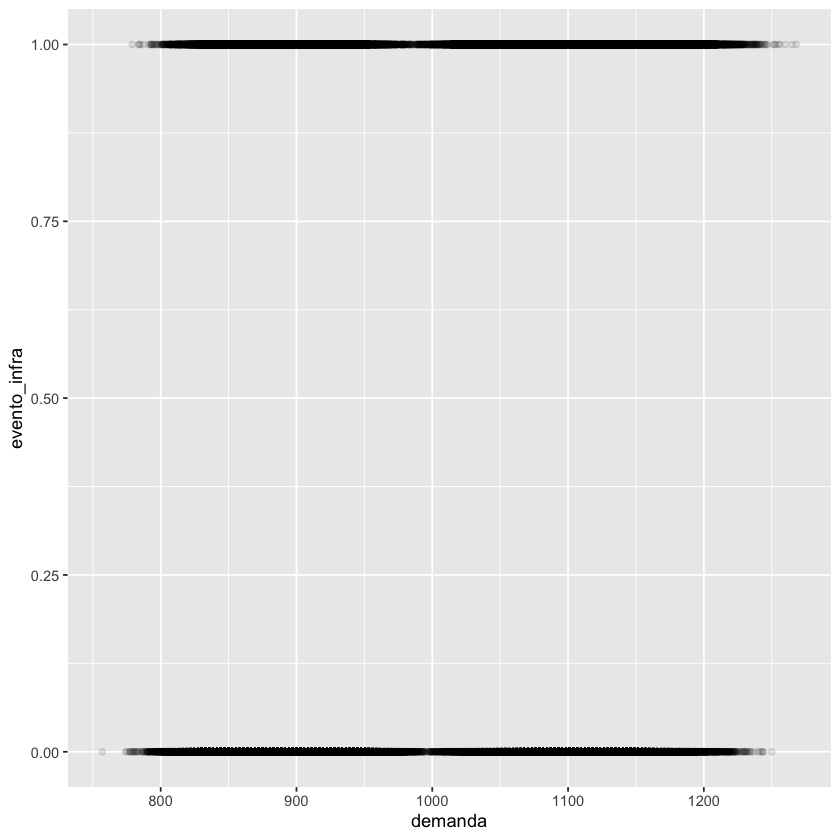

In [13]:
library(readr)
library(DT)
library(ggplot2)

mod_infra <- read_rds("mod_glm_infra.rds")
summary(mod_infra)
mod_infra$model |> 
  ggplot(aes(x = demanda, y = evento_infra)) +
  geom_point(alpha = 0.1)

escenario <- read_csv("ESCENARIO_REGRESION.csv")

escenario |> 
  mutate(Prob.evento = predict(mod_infra, escenario, type = "response")) |> 
  datatable()




### Ejemplos simulación

Rows: 5 Columns: 139
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl (139): consultorios_de_salud, helisuperficies, centros_de_atencion_a_dro...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


,Freq,% Valid,% Valid Cum.,% Total,% Total Cum.
2,88,88,88,88,88
3,12,12,100,12,100
<NA>,0,NA,NA,0,100
Total,100,100,100,100,100


Rows: 10 Columns: 6
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl (6): capacidad, demanda, tmed, prec, velmedia, presMax

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


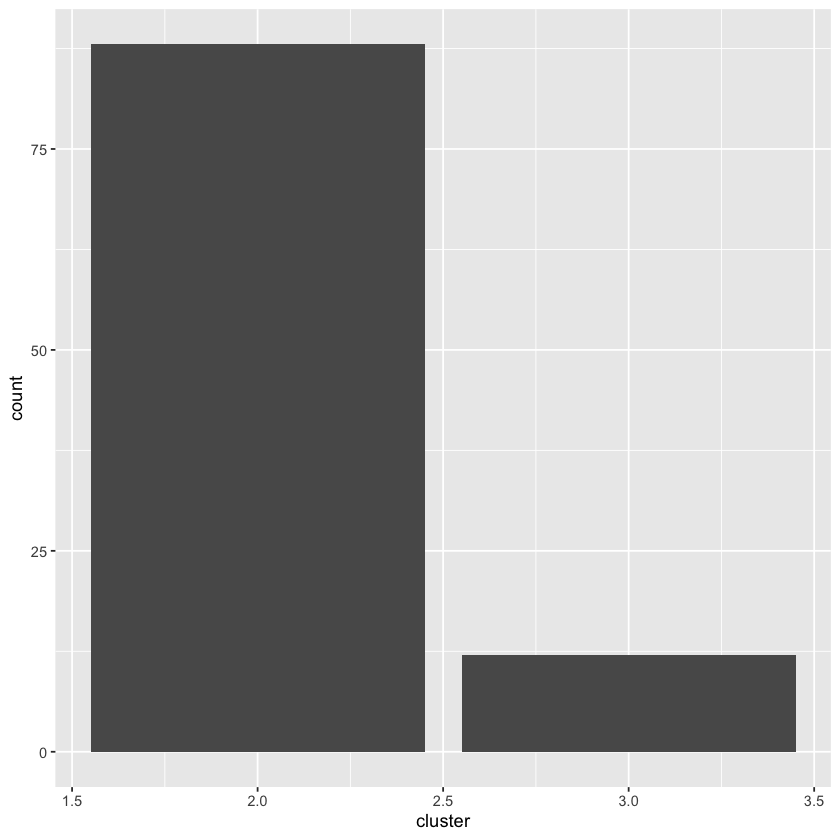

,Freq,% Valid,% Valid Cum.,% Total,% Total Cum.
FALSE,51,51,51,51,51
TRUE,49,49,100,49,100
<NA>,0,NA,NA,0,100
Total,100,100,100,100,100


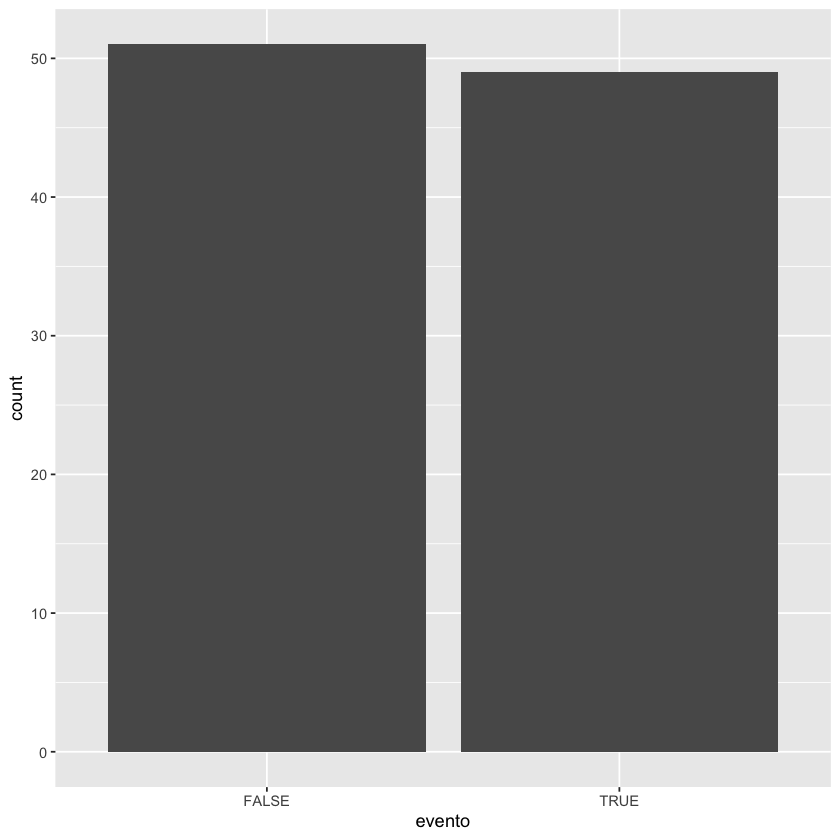

In [16]:
library(readr)
library(mclust)
library(dplyr)
library(purrr)
library(ggplot2)
library(summarytools)

NSIM <- 100

## Simulación clusters

dfout <- read_rds("datos_cluster_distritos.rds")
df_mc <- read_rds("modelo_cluster_distritos.rds")

escenario <- read_csv("ESCENARIO_CLUSTER_DIST.csv")
escenariom <- escenario |> 
  summarise(across(everything(), mean)) |> 
  mutate(across(everything(), ~if_else(.x == 0, 0.1, .x)))

escenarios <- escenario |> 
  summarise(across(everything(), sd)) |> 
  mutate(across(everything(), ~if_else(.x == 0, 0.01, .x)))

## Continuas
icont <- c(61:75, 136:139)
ncont <- colnames(escenario)[icont]

simulacion <- escenariom |> 
  # select(-all_of(irec)) |> 
  imap_dfc(~{
    if (.y %in% ncont) {
      rnorm(NSIM, .x, escenarios |> pull(.y))
    }else{
      rpois(NSIM, .x)
    }
  })

simulacion <- simulacion |> 
  bind_cols(cluster = predict(df_mc, simulacion)$classification) |> 
  relocate(cluster, .before = 1)

simulacion |> 
  ggplot(aes(cluster)) + 
  geom_bar()

simulacion |> freq(cluster) 
  

## Simulación regresión


escenario_reg <- read_csv("ESCENARIO_REGRESION.csv")

## Uno de estos dos según selección (indicar en gráficos y tablas):
mod_glm <- read_rds("mod_glm_infra.rds")
mod_glm <- read_rds("mod_glm_zona.rds")

escenario_regm <- escenario_reg |> 
  summarise(across(everything(), mean)) |> 
  mutate(across(everything(), ~if_else(.x == 0, 0.1, .x)))

escenario_regs <- escenario_reg |> 
  summarise(across(everything(), sd)) |> 
  mutate(across(everything(), ~if_else(.x == 0, 0.01, .x)))

simulacion_reg <- escenario_regm |> 
  imap_dfc(~{
      rnorm(NSIM, .x, escenario_regs |> pull(.y))
  })

simulacion_reg <- simulacion_reg |> 
  bind_cols(evento = predict(mod_glm, simulacion_reg, type = "response") > 0.5) 

simulacion_reg |> 
  ggplot(aes(evento)) + 
  geom_bar()

simulacion_reg |> freq(evento) 


